# 深度学习 实验7 Kmeans & Gaussian Mixture Model

**10185501402 孙秋实 2018级**

本次实验内容包含：
1. 对MNIST手写数字识别数据集进行Kmeans聚类，并分析簇中的数据分布情况
2. 使用GMM模型进行分析
3. 对二者进行可视化展示，观察聚簇状态和聚类中心
4. 使用信息准则辅助超参数的选取

# 实验预先准备

首先加载一些必要的python库和可视化工具

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

调用sklearn库，加载用于画图的工具

In [7]:
from sklearn import cluster

调用sklearn的聚类工具

In [6]:
from sklearn.mixture import GaussianMixture

调用高斯混合模型

**Remark:**这个地方要注意这个库名是`GaussianMixture`，网上很多帖子里都是 `from sklearn.mixture import GMM` 查看scikit-learn比较新新版本的官方文档后可以发现 `GMM` 被替换为 `GaussianMixture`

In [11]:
from sklearn.decomposition import PCA

最后需要导入主成分分析，我们在后面的步骤中实现可视化聚类结果时需要降维

读取MNIST手写数字数据集

In [8]:
train = pd.read_csv('data/mnist_train.csv')
test = pd.read_csv('data/mnist_test.csv')

In [9]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [10]:
train.head(8)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_label = train['label']
test_label = test['label']
# Drop the label feature
train_vis = train.drop("label",axis=1)
test_vis = test.drop("label",axis=1)

# Kmeans聚类

## 关于MNIST

实验开始前，看一下数据集中的数字，其实从最后的聚类结果可以看出聚类算法的“准则”是可以自己看出来的

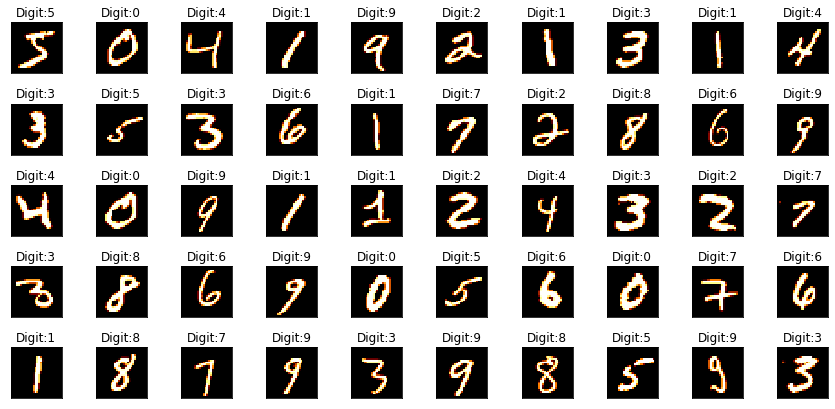

In [14]:
# plot some of the numbers
plt.figure(figsize=(12,8))
for digit_num in range(0,50):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_vis.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
    each_title = 'Digit:'+str(train_label[digit_num])
    plt.title(each_title)
plt.tight_layout()

## 使用Kmeans聚类MNIST

In [15]:
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42,max_iter = 2500)
clf.fit(train_vis)

KMeans(max_iter=2500, n_clusters=10, random_state=42)

**关于k-means++：**最原始简单的K-means算法最开始随机选取数据集中K个点作为聚类中心，这些初始的聚类中心都是随机的，而常识告诉我们这几个聚类中心应该是离得越远越好。K-means++按照如下的思想选取K个聚类中心：假设已经选取了m个初始聚类中心(0<m<K)，则在选取第m+1个聚类中心时，距离当前m个聚类中心越远的点会有更高的概率被选为第n+1个聚类中心。在选取第一个聚类中心(n=1)时同样通过随机的方法。使用这种方法可以加速收敛

In [17]:
print(clf.labels_.shape)

(60000,)


In [19]:
y_pred = clf.predict(test_vis)

In [22]:
zero = 0
zero_pred = 0
for i in range (0,10000):
    if(test_label[i] == 1):
        zero +=1
        if(y_pred[i]==1):
            zero_pred+=1
#         print("pred:",y_pred[i],"truth:",test_label[i])
        
print(zero,zero_pred)

1135 660


## Kmeans算法聚类分析与可视化

### Kmeans聚类结果分析

接下来，打印出聚类结果的一个簇，把这个簇的结果和真实标签做对比

Text(0.5, 1.0, 'Kmeans Cluster 1')

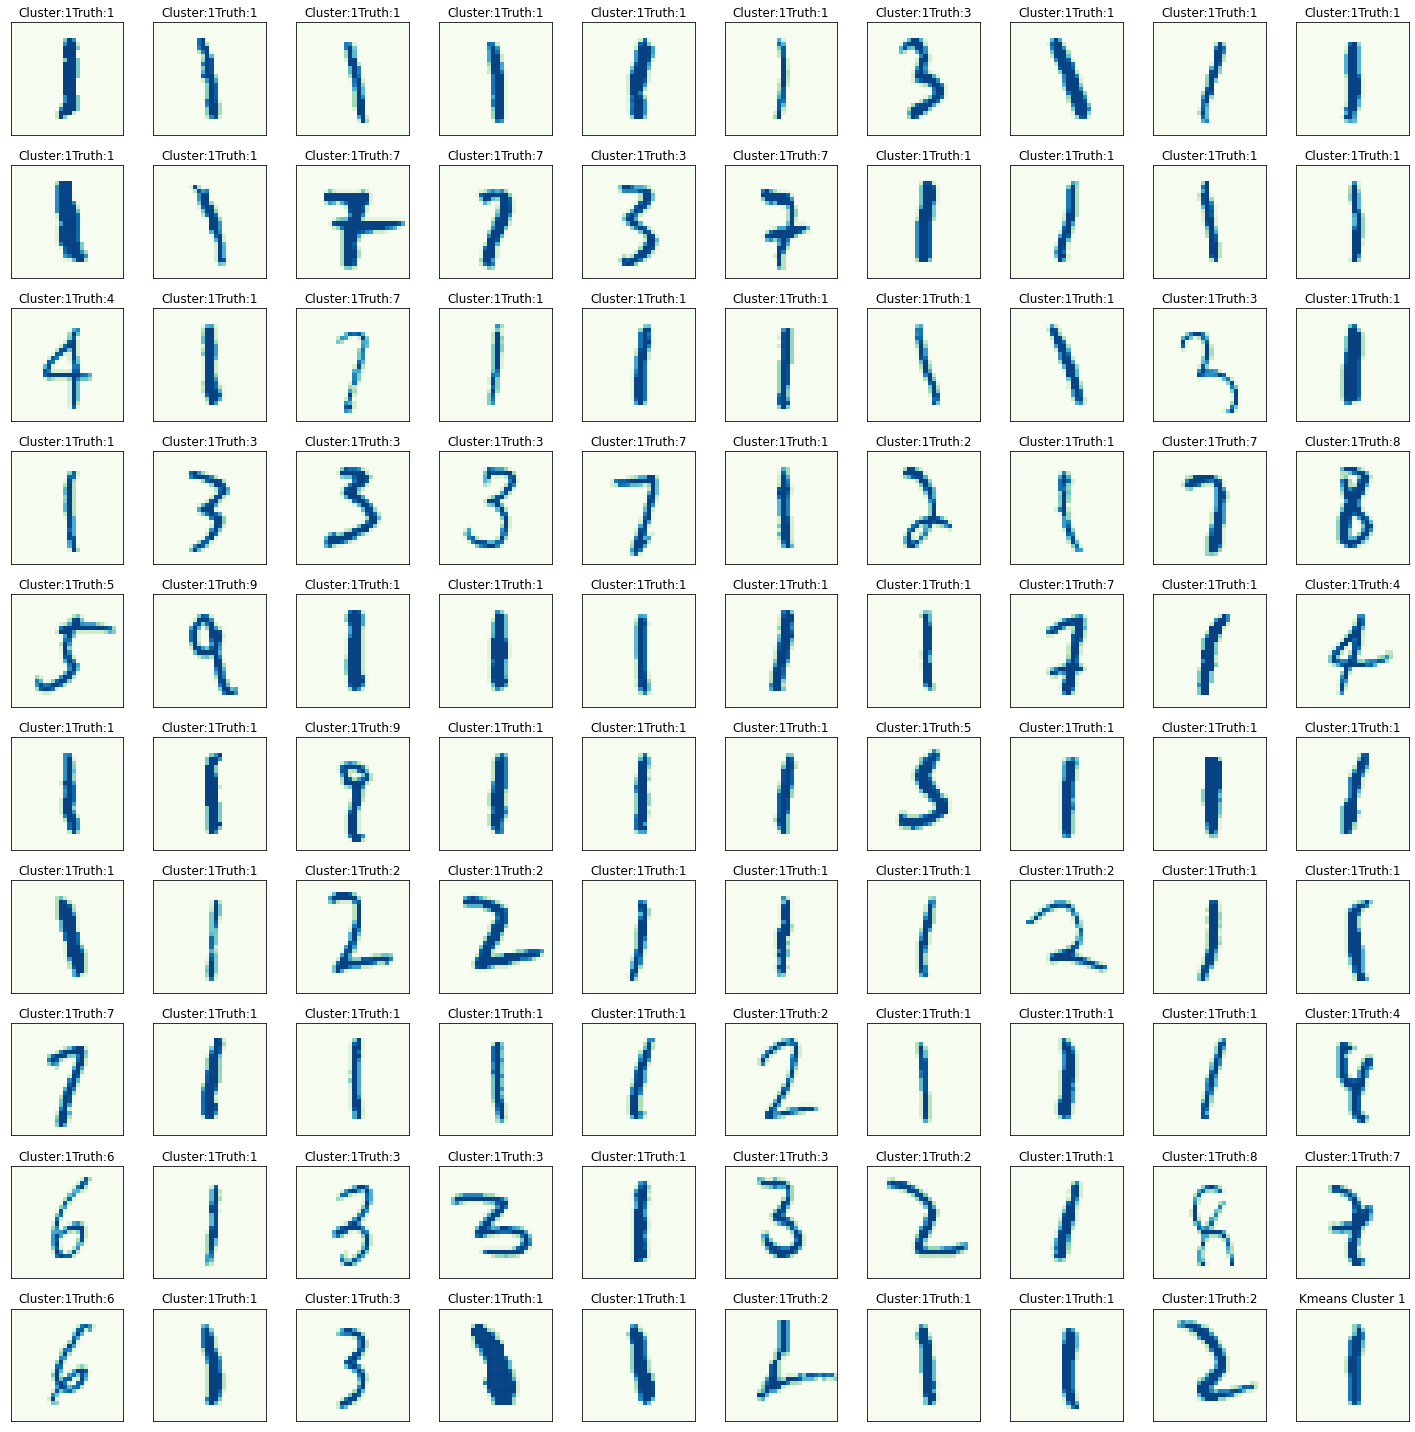

In [31]:
cluster_list = []

# 挑选出编号为1的簇
for i in range(0,5000):
    if(y_pred[i]==1):
        cluster_list.append(i)
# cluster_list

plt.figure(figsize=(20,20))
i = 0
for digit_num in cluster_list:
    if(i == 100):break # 打印一百个样本用于查看
    plt.subplot(10,10,i+1)
    grid_data = test_vis.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "GnBu")
    plt.xticks([])
    plt.yticks([])
    each_title = 'Cluster:'+str(y_pred[digit_num])+'Truth:'+str(test_label[digit_num])
    plt.title(each_title)
    i+=1
    
plt.tight_layout()
plt.title("Kmeans Cluster 1")

从上面的抽样中可以看到，第一簇数据里面主要是数字1构成，被错误分类的数据有一个特点，那就是相对“瘦长”一些，接下来具体看一下这个簇内的数据分布

In [39]:
digits_distr=[]
for num in range(0,9):
    temp_digit_num = 0
    for digit_num in cluster_list:
        if(test_label[digit_num] == num):temp_digit_num+=1
    digits_distr.append(temp_digit_num)

In [51]:
sum(digits_distr)#该类图片个数个数

684

In [40]:
digits_distr

[0, 438, 45, 63, 17, 17, 24, 51, 29]

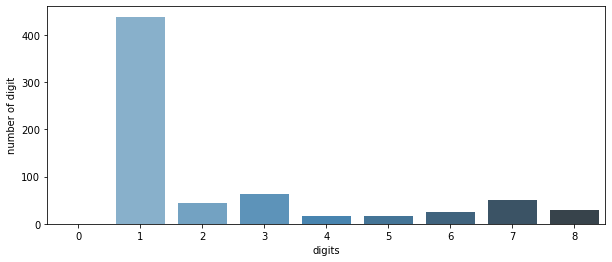

In [49]:
df = pd.DataFrame()
df['digits'] = [i for i in range (0,9)]
df['number of digit'] =  digits_distr
plt.figure(figsize=(10, 4))
p1=sns.barplot( data=df, x='digits', y='number of digit',palette="Blues_d")
plt.show()

我们明显可以看到1占据了绝大多数，其他的数字占比都比较小，没有出现0（可能是因为0只有圈吧）

如果把这个簇归为数字1的类，那么这个Kmeans聚类算法的测试集准确度为 65%，其他的聚类簇如果按照最多的数字决定这个簇为第几个数字的聚类结果的话，结果有好有坏，直接调用上述方法可以重复其他簇的可视化。

### Kmeans簇的可视化

刚刚只分析了一个聚类后形成的簇，接下来对整个聚类结果进行可视化展示，但在这开始之前，我们需要先给数据进行降维，这部和实验6中的类似，在此不过多赘述

In [52]:
X = train.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0],
               reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) 

In [53]:
pca = PCA(n_components = 2)
pca.fit(train)
train_data_pca = pca.transform(train)
test_data_pca = pca.transform(test)

In [54]:
len(test_data_pca)

10000

In [55]:
pca_clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42,max_iter = 2500)
pca_clf.fit(train_data_pca)

KMeans(max_iter=2500, n_clusters=10, random_state=42)

In [56]:
print(pca_clf.labels_.shape)
print(pca_clf.labels_[0:101])
y_pred = pca_clf.predict(test_data_pca)

(60000,)
[0 1 2 6 2 0 3 4 3 2 9 3 5 0 6 8 0 3 9 3 7 1 3 6 9 5 2 5 0 3 3 9 0 3 4 3 0
 4 2 0 6 9 2 3 3 8 3 3 3 5 9 1 7 3 8 0 1 2 7 6 7 3 5 1 7 6 0 6 5 1 9 2 6 0
 9 4 9 6 6 2 5 1 1 0 8 9 3 8 1 8 4 8 8 0 3 1 2 0 9 6 2]


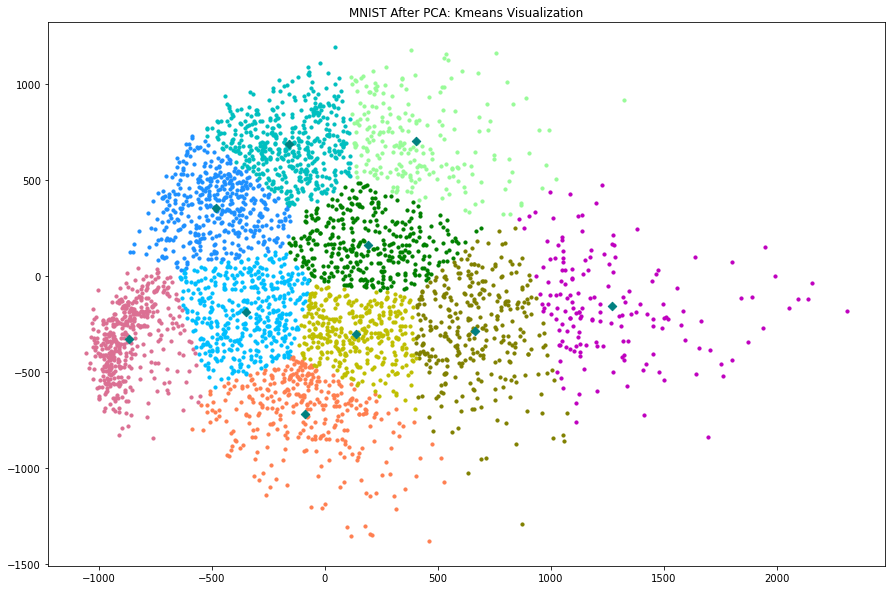

In [206]:
plt.figure(figsize=(15,10))
all_points = []
colors = ['dodgerblue', 'g', 'palevioletred', 'c', 'm', 'y', 'coral', 'palegreen','deepskyblue','olive']
i = 0 
while i < 3500:
    point = [test_data_pca[i][0],test_data_pca[i][1]]
    all_points.append(point)
    i+=1
# 调用KMeans方法, 聚类数为4个，fit()之后开始聚类
kmeans = cluster.KMeans(n_clusters=10).fit(all_points)
plt.title('MNIST After PCA: Kmeans Visualization')
# print('all_points_len: ',len(all_points))
# print('k_label_len:',len(kmeans.labels_))
# print(all_points[0][0],all_points[0][1])
centroids = kmeans.cluster_centers_

for id, label in enumerate(kmeans.labels_):
    plt.scatter(all_points[id][0], all_points[id][1], color = colors[label], marker='o', s=10)
    
# 此处应该先把点画上，再画聚类中心，否则会被盖住！
for c in range(0,10):
    plt.scatter(centroids[c][0], centroids[c][1], color = 'teal', marker='D') # diamond

可以看到Kmeans的结果，图像在空间中比较均匀的被划分，并用棱形标注了聚类中心

# 高斯混合模型 Gaussian Mixture Model

为什么使用GMM？前面的实验中使用的Kmeans聚类算法非常易于理解，但是他的简单性也为实际应用带来了挑战。Kmeans算法的性能不如人意的根本为题是，其不基于样本的概率分布做决策，而仅仅依靠欧氏距离进行决策。这种方法对有显著分布差异的图像分类比较有效，但一旦数据集复杂，那么Kmeans的效果就会大打折扣（我个人理解其为模型无法跨越“语义鸿沟”）

高斯混合模型试图找到多维高斯模型概率分布的混合体，从而找到最适合数据的概率分布。在分类MNIST手写数字的最简单的场景中，GMM可以用与k-means类似的方式进行聚类。

## 使用GMM聚类MNIST

In [60]:
import time # 比较二者所耗费的时间差异

In [ ]:
Gmm_starttime = time.time()
gmm1 = GaussianMixture(n_components=10).fit(train_vis)
Gmm_endtime = time.time()

In [64]:
print('GMM Time Consumption:',round(Gmm_endtime-Gmm_starttime),"secs")

GMM Time Consumption: 949 secs


实验课上提到了GMM模型训练的时间耗费比较大，经过这次实验，不得不说GMM的聚类非常耗时，我们可以尝试比较下二者的聚类速度

这时候，我们重新用刚刚的kmeans算法比较一下时间开销

In [68]:
clf_time_consumption = cluster.KMeans(init='k-means++', n_clusters=10, random_state=40)
kmeans_starttime = time.time()
clf_time_consumption.fit(train_vis)
kmeans_endtime = time.time()
print('Kmeans Time Consumption:',round(kmeans_endtime-kmeans_starttime),"secs")

Kmeans Time Consumption: 23 secs


可以看到，GMM耗费了949秒拟合训练集，而Kmeans拟合到收敛只花费了23秒（这里没考虑到初始值以及其他一些variants造成的影响，个人觉得定性的理解就好）

In [69]:
y_gmm_pred = gmm1.predict(test_vis)

In [71]:
len(y_gmm_pred) # sanity check

10000

Text(0.5, 1.0, 'GMM Cluster 1')

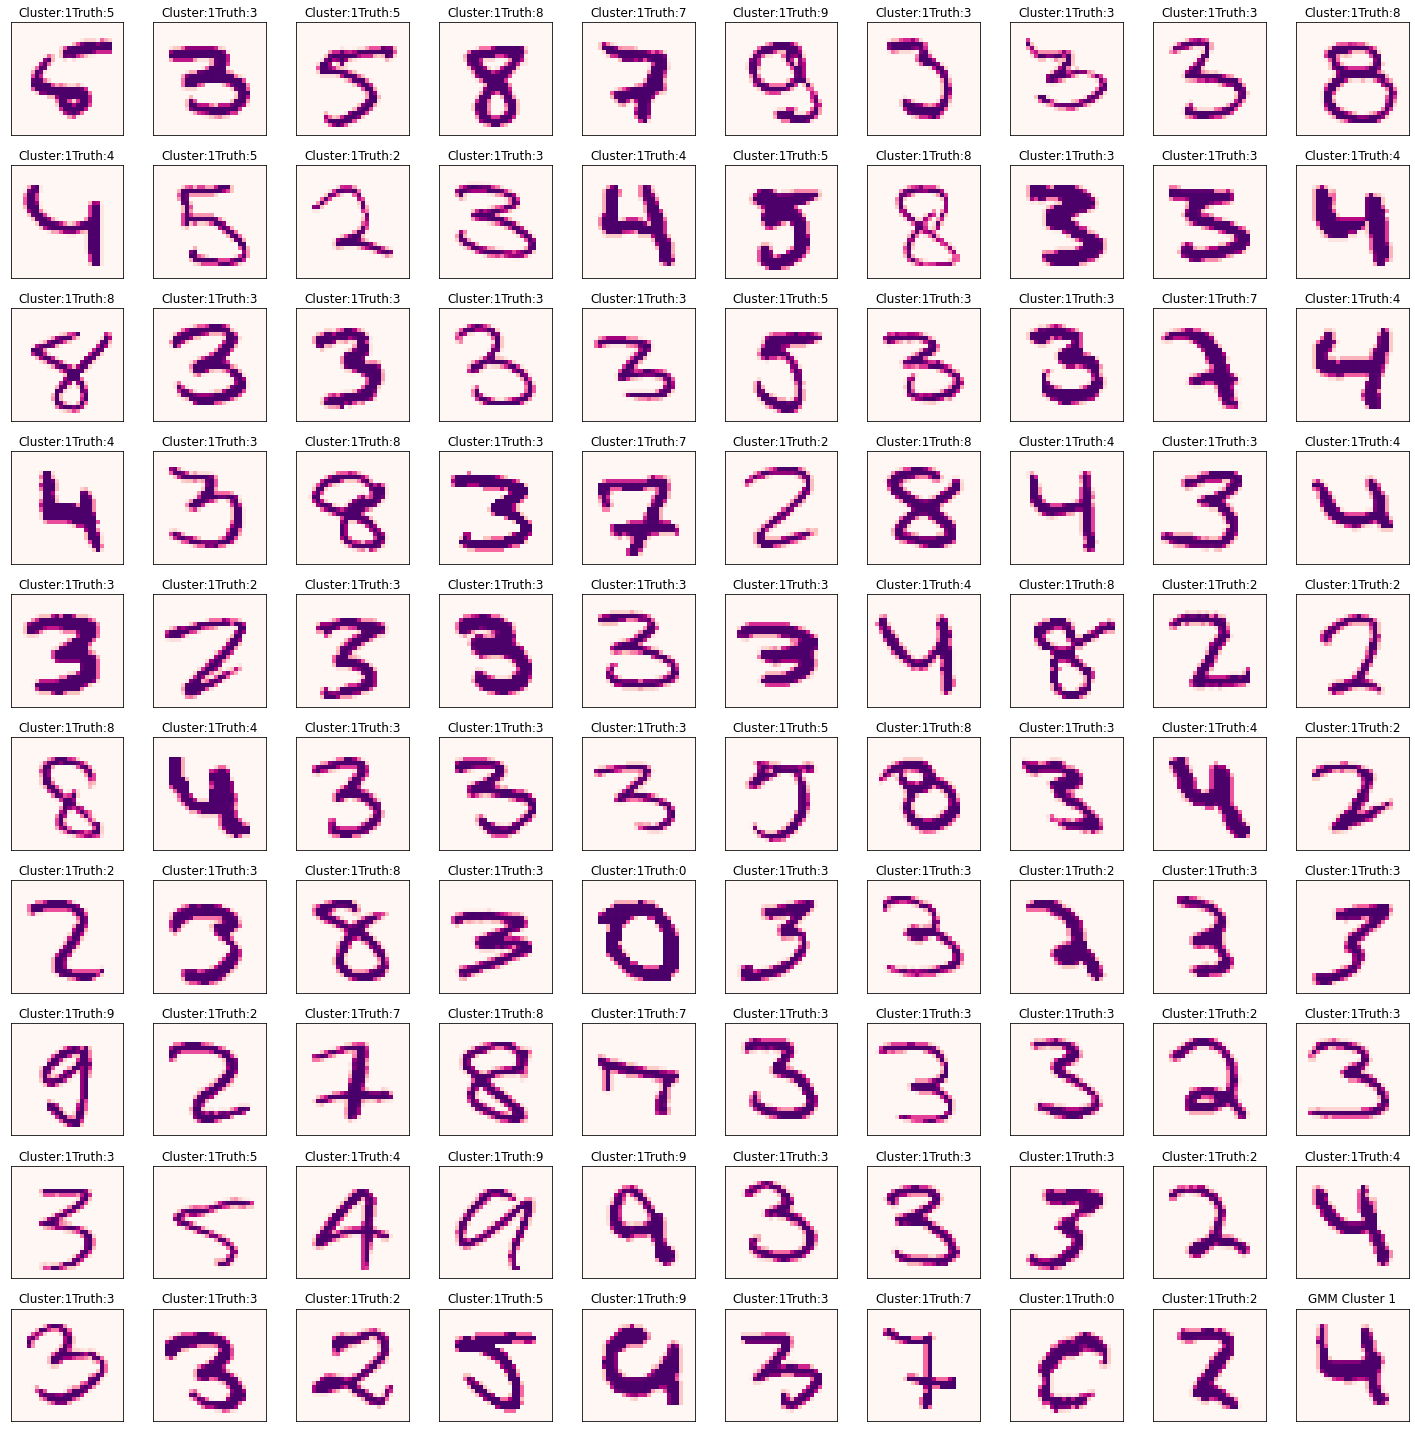

In [74]:
cluster_gmm_list = []
# 挑选出编号为1的GMM
for i in range(0,5000):
    if(y_gmm_pred[i]==1):
        cluster_gmm_list.append(i)

plt.figure(figsize=(20,20))
i = 0
for digit_num in cluster_gmm_list:
    if(i == 100):break # 打印一百个样本用于查看
    plt.subplot(10,10,i+1)
    grid_data = test_vis.iloc[digit_num].values.reshape(28,28) 
    plt.imshow(grid_data, interpolation = "none", cmap = "RdPu")
    plt.xticks([])
    plt.yticks([])
    each_title = 'Cluster:'+str(y_gmm_pred[digit_num])+'Truth:'+str(test_label[digit_num])
    plt.title(each_title)
    i+=1
    
plt.tight_layout()
plt.title("GMM Cluster 1")

（这聚类结果比较离谱，不过因为是无监督学习也情有可原）

## GMM聚类结果分析与可视化

### GMM聚类MNIST结果分析

In [79]:
digits_gmm_distr=[]
for num in range(0,9):
    temp_digit_num = 0
    for digit_num in cluster_gmm_list:
        if(test_label[digit_num] == num):temp_digit_num+=1
    digits_gmm_distr.append(temp_digit_num)

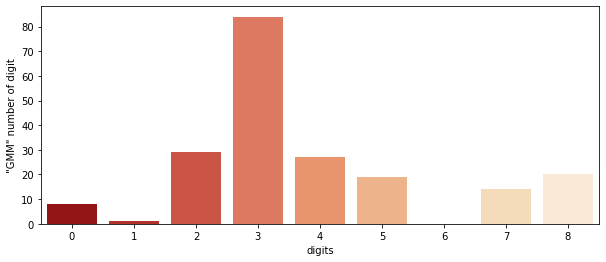

In [84]:
df = pd.DataFrame()
df['digits'] = [i for i in range (0,9)]
df['"GMM" number of digit'] =  digits_gmm_distr
plt.figure(figsize=(10, 4))
p1=sns.barplot( data=df, x='digits', y='"GMM" number of digit',palette="OrRd_r")
plt.show()

可以看到，对测试集做一个GMM聚簇后，第一个Cluster的结果以3为主，但准确率不尽人意，我们再尝试另外几个簇

In [111]:
cluster_gmm_list_extra = []
# 挑选出编号为1的GMM
for clus in range (1,5):
    cluster_gmm_list_temp = []
    for i in range(0,8000): #选取8000个测试样本
        if(y_gmm_pred[i]==clus):
            cluster_gmm_list_temp.append(i)
    cluster_gmm_list_extra.append(cluster_gmm_list_temp)

In [113]:
digits_gmm_distr_extra=[]
for clus in range (1,5):
    digits_gmm_distr_temp = [] # 变量名有点长...
    for num in range(0,9):
        temp_digit_num = 0
        for digit_num in cluster_gmm_list_extra[clus-1]:
            if(test_label[digit_num] == num):temp_digit_num+=1
        digits_gmm_distr_temp.append(temp_digit_num)
#         print(digits_gmm_distr_temp)
    digits_gmm_distr_extra.append(digits_gmm_distr_temp)

In [115]:
digits_gmm_distr_extra[1] # sanity check~

[3, 1, 6, 31, 228, 20, 0, 465, 61]

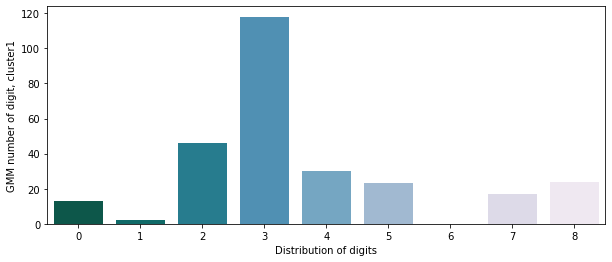

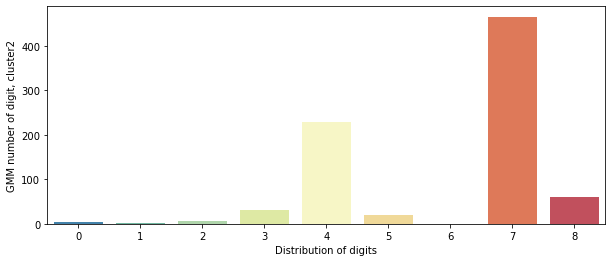

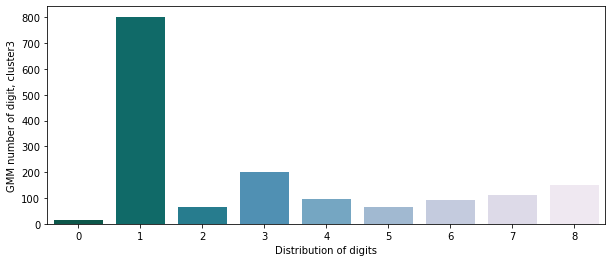

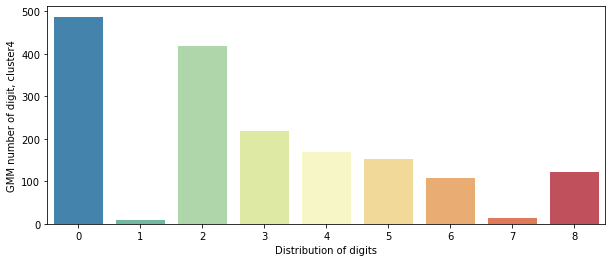

In [131]:
for i in range (0,4):
    df = pd.DataFrame()
    df['Distribution of digits'] = [i for i in range (0,9)]
    cluster_name = "GMM number of digit, cluster"+str(1+i)
    df[cluster_name] =  digits_gmm_distr_extra[i]
    plt.figure(figsize=(10, 4))
    if i%2==0: 
        palette = "PuBuGn_r" 
    else:
        palette = "Spectral_r" # 换个颜色玩玩
    p1=sns.barplot( data=df, x='Distribution of digits', y=cluster_name,palette=palette)
    plt.show()

从上述图片中可以观察到，GMM聚类的效果在不同的Clusters时好时坏

### GMM簇的可视化

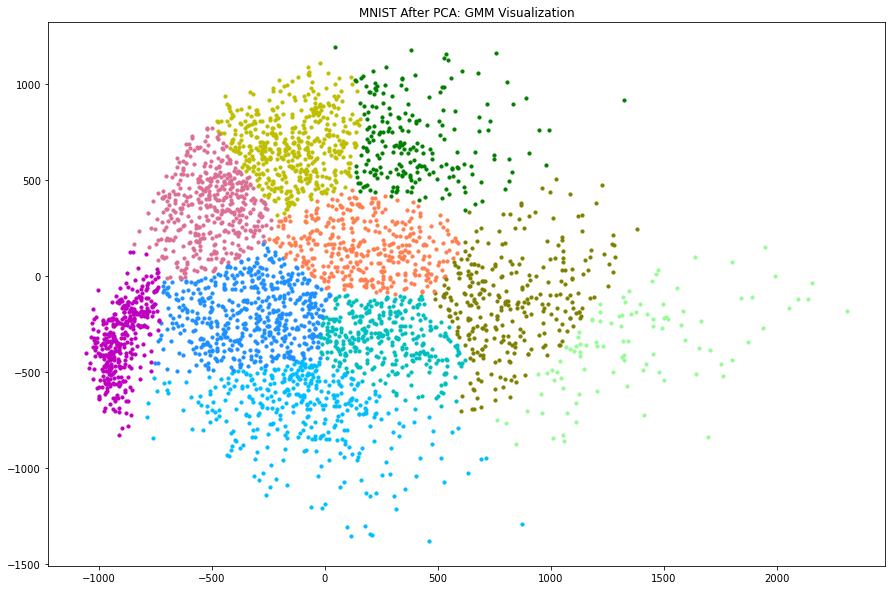

In [138]:
plt.figure(figsize=(15,10))
all_points = []
colors = ['dodgerblue', 'g', 'palevioletred', 'c', 'm', 'y', 'coral', 'palegreen','deepskyblue','olive']
i = 0 
while i < 3500:
    point = [test_data_pca[i][0],test_data_pca[i][1]]
    all_points.append(point)
    i+=1
    
gmm_visualize = GaussianMixture(n_components=10).fit(all_points)
plt.title('MNIST After PCA: GMM Visualization')
for id, label in enumerate(gmm_visualize.predict(all_points)):
    plt.scatter(all_points[id][0], all_points[id][1], color = colors[label], marker='o', s=10)

如上图所示，我们获得了GMM对3,500个样本的分布的可视化，与Kmeans相比，个人认为GMM可视化后样本簇的边缘更加“平滑”一些

# GMM Model Selection

接下来通过信息准则来确定“最优”的GMM成分个数
1. 赤池信息准则：AIC
2. 贝叶斯信息准则：BIC

In [144]:
n = 0 
info_criterion_data = []
while n < 8000:
    point = [test_data_pca[i][0],test_data_pca[i][1]]
    info_criterion_data.append(point)
    n+=1

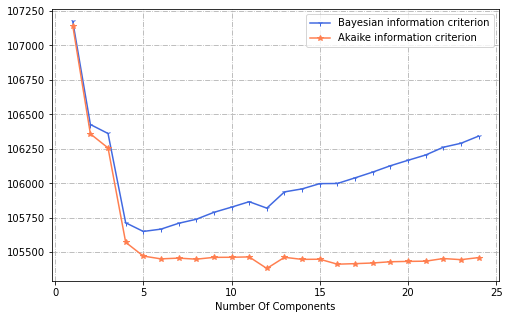

In [152]:
all_points_arr = np.array(all_points)

n_components = np.arange(1, 25)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(all_points)
          for n in n_components]

plt.plot(n_components, [m.bic(all_points_arr) for m in models], label='Bayesian information criterion',color='royalblue',marker='1')
plt.plot(n_components, [m.aic(all_points_arr) for m in models], label='Akaike information criterion',color='coral',marker='*')
plt.legend(loc='best')
plt.gcf().set_size_inches(8, 5)
plt.grid(linestyle='-.')
plt.xlabel('Number Of Components');

由上述信息准则可见，对于我们抽样的8,000个样本的拟合而言，12个GMM成分会是个好选择